In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

<AxesSubplot:xlabel='age', ylabel='length_of_service'>

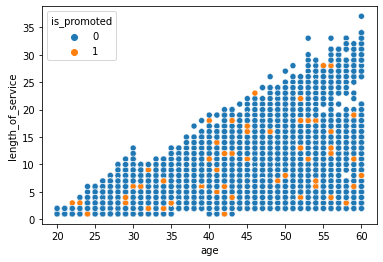

In [4]:
sns.scatterplot(data=df, x='age',y='length_of_service',hue='is_promoted')

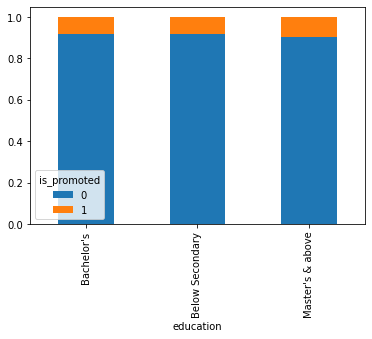

In [5]:
#%matplotlib inline
#pd.crosstab(df.department,df.is_promoted).plot(kind='bar')
table=pd.crosstab(df.education ,df.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

## Input Data

In [6]:
data = pd.read_csv('data_prep.csv')

In [7]:
data

,department_0,department_1,department_2,department_3,region_0,region_1,region_2,region_3,region_4,region_5,...,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,35,5.0,8,0,49,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,30,5.0,4,0,60,0
2,0,0,0,1,0,0,0,0,1,1,...,0,0,1,1,34,3.0,7,0,50,0
3,0,0,0,1,0,0,0,1,0,0,...,1,0,0,2,39,1.0,10,0,50,0
4,0,0,1,1,0,0,0,1,0,1,...,1,0,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,1,1,0,0,1,1,1,0,...,0,0,1,1,48,3.0,17,0,78,0
54804,0,0,1,0,0,1,0,1,1,1,...,1,0,0,1,37,2.0,6,0,56,0
54805,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,27,5.0,3,0,79,0
54806,0,0,0,1,1,0,0,0,0,1,...,0,0,1,1,29,1.0,2,0,45,0


In [8]:
data_temp =[]
def data_info():
  for i in data.columns: #mengiterasi i di setiap kolom pada dataset
      data_temp.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list
        i,
        data[i].dtypes, #tipe
        data[i].isna().sum(), #jumlah NaN
        round((((data[i].isna().sum())/(len(data)))*100),2),  #Persentase jumlah NaN
        data[i].nunique(),  #Jumlah Unique
        data[i].unique() #Unique
    ])
  return pd.DataFrame(data_temp, columns=['column','type','NaN','NaN%','n_unique','unique']) # membuat dataframe dengan data train_describe dengan kolom-kolom tersebut

In [9]:
data_info()

,column,type,NaN,NaN%,n_unique,unique
0,department_0,int64,0,0.0,2,"[0, 1]"
1,department_1,int64,0,0.0,2,"[0, 1]"
2,department_2,int64,0,0.0,2,"[0, 1]"
3,department_3,int64,0,0.0,2,"[1, 0]"
4,region_0,int64,0,0.0,2,"[0, 1]"
5,region_1,int64,0,0.0,2,"[0, 1]"
6,region_2,int64,0,0.0,2,"[0, 1]"
7,region_3,int64,0,0.0,2,"[0, 1]"
8,region_4,int64,0,0.0,2,"[0, 1]"
9,region_5,int64,0,0.0,2,"[1, 0]"


## Data Splitting

In [10]:
X = data.drop(columns='is_promoted')
y = data['is_promoted']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department_0                  54808 non-null  int64  
 1   department_1                  54808 non-null  int64  
 2   department_2                  54808 non-null  int64  
 3   department_3                  54808 non-null  int64  
 4   region_0                      54808 non-null  int64  
 5   region_1                      54808 non-null  int64  
 6   region_2                      54808 non-null  int64  
 7   region_3                      54808 non-null  int64  
 8   region_4                      54808 non-null  int64  
 9   region_5                      54808 non-null  int64  
 10  gender_f                      54808 non-null  int64  
 11  gender_m                      54808 non-null  int64  
 12  recruitment_channel_other     54808 non-null  int64  
 13  r

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    stratify=y, # menjaga agar proporsi default pada data train dan data test tetap sama
                                                    test_size=0.2, # membagi data train:test = 80:20
                                                    random_state= 10 # random state harus konsisten
                                                    )

## Benchmarking

In [13]:
tree = DecisionTreeClassifier(random_state=10)
randfor = RandomForestClassifier(random_state=10)
xgb = XGBClassifier(random_state=10)
logreg = LogisticRegression(random_state = 10)
svm = SVC(random_state=10)
knn = KNeighborsClassifier(n_neighbors=10)

In [14]:
models = [tree,randfor,xgb,logreg,svm,knn]
modelName = ['Decision Tree','Random Forest','XGBoost','Logistic Regression','SVM','KNN']

In [15]:
def model_evaluation_cv(model,metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring=metric)
  return model_cv

In [16]:
for i in models:
    cross_val = model_evaluation_cv(i, 'recall')
    print('Result for ',i)
    print('CV score ',cross_val)
    print('CV score mean',cross_val.mean())
    print('CV score std',cross_val.std())
    print('-----------------------------------------------------------------------')

Result for  DecisionTreeClassifier(random_state=10)
CV score  [0.4042838  0.41767068 0.41231593 0.3935743  0.42091153]
CV score mean 0.4097512480664391
CV score std 0.009853259358482814
-----------------------------------------------------------------------
Result for  RandomForestClassifier(random_state=10)
CV score  [0.22356091 0.25568942 0.23159304 0.24899598 0.24262735]
CV score mean 0.24049334065484457
CV score std 0.0116076909950415
-----------------------------------------------------------------------
[20:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

Dari hasil perbandingan cross validation tiap model, kita lihat model XGBoost memiliki tingkat akurasi paling tinggi dalam memprediksi data kita. Dengan demikian kita akan memilih model ini untuk kita gunakan dan akan melakukan optimasi lebih lanjut.

## Hyperparameter Tuning

In [17]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train,y_train)

[21:02:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred_xgb = xgb.predict(X_test)

### Model Performance Before Hyperparameter Tuning

In [19]:
print('recall', recall_score(y_test, y_pred_xgb))
print('precision', precision_score(y_test, y_pred_xgb))
print('f1', f1_score(y_test, y_pred_xgb))
print('accuracy', accuracy_score(y_test, y_pred_xgb))

recall 0.3511777301927195
precision 0.9010989010989011
f1 0.5053929121725733
accuracy 0.9414340448823207


In [20]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.90      0.35      0.51       934

    accuracy                           0.94     10962
   macro avg       0.92      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



TP:  328
TN:  9992
FP:  36
FN:  606


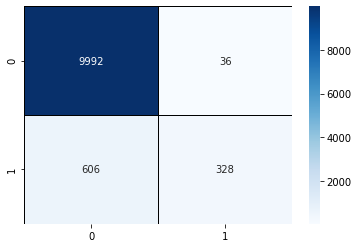

In [21]:
conmat = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = conmat.ravel()
sns.heatmap(data=conmat, annot=True, linewidth=0.7, linecolor="k", fmt=".0f", cmap="Blues")
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)

In [22]:
test_table = pd.DataFrame({'y_actual':y_test})
print(test_table.value_counts(),test_table.value_counts()/len(y_test)*100)

y_actual
0           10028
1             934
dtype: int64 y_actual
0           91.479657
1            8.520343
dtype: float64


In [23]:
pred_table = pd.DataFrame({'y_pred_xgb':y_pred_xgb})
print(pred_table.value_counts(),pred_table.value_counts()/len(y_pred_xgb)*100)

y_pred_xgb
0             10598
1               364
dtype: int64 y_pred_xgb
0             96.679438
1              3.320562
dtype: float64


Walaupun akurasi model cukup baik, namun karena proporsi class 1 dan 0 dari label/target 'is_promoted' adalah imbalance mencapai 8.5%:91.5%, maka nilai akurasi saja tidak bisa kita jadikan patokan untuk menentukan model yang terbaik.
Di kasus ini kita tertarik untuk meminimalisir jumlah karyawan yang diprediksi untuk promoted padahal seharusnya tidak. Dan karyawan yang harusnya dipromosi tetap mendapat kesempatan terbaik dalam prediksi untuk dipromosi. Maka metric yang tertarik kita amati adalah **f1-score** yang paling maksimal dari model, dan diharapkan dapat menaikkan jumlah kelas positif.

Kita akan mencoba melakukan parameter tuning dengan GridSearch untuk meningkatkan performa model

## Hyperparameter Tuning

In [24]:
param_xgb = {
    'max_depth':[3,6,9],
    'subsample':[0.7,1],
    'min_child_weight':[2,5,7]
}

# hyperparameter tuning
grid_search = GridSearchCV(
    xgb, # model to tune
    param_grid = param_xgb, # hyperparameter
    cv = 5, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

grid_search.fit(X_train, y_train)
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

[21:05:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score 0.5001204914847197
best param {'max_depth': 6, 'min_child_weight': 5, 'subsample': 1}


In [25]:
grid_search.best_estimator_.fit(X_train,y_train)

[21:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
y_pred_grid = grid_search.predict(X_test)

In [27]:
print('recall', recall_score(y_test, y_pred_grid))
print('precision', precision_score(y_test, y_pred_grid))
print('f1', f1_score(y_test, y_pred_grid))
print('accuracy', accuracy_score(y_test, y_pred_grid))

recall 0.3468950749464668
precision 0.9126760563380282
f1 0.5027152831652444
accuracy 0.941525269111476


In [28]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.91      0.35      0.50       934

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [29]:
pred_table = pd.DataFrame({'y_pred_xgb':y_pred_xgb})
print(pred_table.value_counts(),pred_table.value_counts()/len(y_pred_xgb)*100)

y_pred_xgb
0             10598
1               364
dtype: int64 y_pred_xgb
0             96.679438
1              3.320562
dtype: float64


Hasil parameter tuning dengan Grid Search menunjukkan perbandingan prediksi masih jauh dari perbandingan aktual nya. Maka dari itu kita coba kombinasi-kan dengan metode oversampling dengan SMOTE.

## Parameter Tuning with SMOTE oversampling

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy=0.8, k_neighbors=7,random_state=10)
X_sample, y_sample = smote.fit_resample(X_train,y_train)

xgb = XGBClassifier(random_state=10)

In [31]:
xgb.fit(X_sample,y_sample)

[21:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(len(X_sample))

72201


In [33]:
print(pd.DataFrame(y_sample).value_counts(),pd.DataFrame(y_sample).value_counts()/len(y_sample)*100)

is_promoted
0              40112
1              32089
dtype: int64 is_promoted
0              55.556017
1              44.443983
dtype: float64


In [34]:
# hyperparameter tuning after oversampling
grid_smote = GridSearchCV(
    xgb, # model to tune
    param_grid = param_xgb, # hyperparameter
    cv = 5, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

grid_smote.fit(X_train, y_train)
print('best score',grid_smote.best_score_)
print('best param',grid_smote.best_params_)

[21:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score 0.5001204914847197
best param {'max_depth': 6, 'min_child_weight': 5, 'subsample': 1}


In [35]:
grid_smote.best_estimator_.fit(X_train, y_train)

[21:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_grid_smote = grid_smote.predict(X_test)

In [37]:
print('recall', recall_score(y_test, y_grid_smote))
print('precision', precision_score(y_test, y_grid_smote))
print('f1', f1_score(y_test, y_grid_smote))
print('accuracy', accuracy_score(y_test, y_grid_smote))

recall 0.3468950749464668
precision 0.9126760563380282
f1 0.5027152831652444
accuracy 0.941525269111476


In [38]:
print(classification_report(y_test, y_grid_smote))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.91      0.35      0.50       934

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



TP:  324
TN:  9997
FP:  31
FN:  610


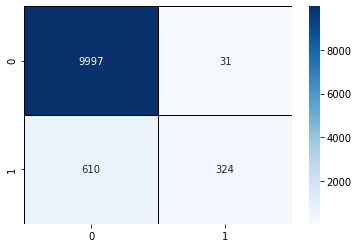

In [39]:
conmat = confusion_matrix(y_test, y_grid_smote)
tn, fp, fn, tp = conmat.ravel()
sns.heatmap(data=conmat, annot=True, linewidth=0.7, linecolor="k", fmt=".0f", cmap="Blues")
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)

In [40]:
pred_table = pd.DataFrame({'y_grid_smote':y_grid_smote})
print(pred_table.value_counts(),pred_table.value_counts()/len(y_grid_smote)*100)

y_grid_smote
0               10607
1                 355
dtype: int64 y_grid_smote
0               96.76154
1                3.23846
dtype: float64


Ternyata penggunaan metode sampling juga tidak membantu model kita untuk meningkatkan performa nya.

## Comparing Score

In [57]:
from sklearn.metrics import f1_score
method = [xgb, grid_search, grid_smote]
recall = []
precision = []
fone = []
accuracy = []

for i in range(len(method)):
    y_p = method[i].predict(X_test)
    recall.append(recall_score(y_test,y_p))
    precision.append(precision_score(y_test,y_p))
    fone.append(f1_score(y_test,y_p))
    accuracy.append(accuracy_score(y_test,y_p))

mod = ['XGBoost','GridSeacrhCV','GridSearchCV_SMOTE']


In [58]:

compare = {}
compare["Method"] = mod
compare["Recall"] = recall
compare["Precision"] = precision
compare["f1_score"] = fone
compare["Accuracy"] = accuracy

tabel = pd.DataFrame.from_dict(compare)
tabel


,Method,Recall,Precision,f1_score,Accuracy
0,XGBoost,0.404711,0.659686,0.501659,0.931491
1,GridSeacrhCV,0.346895,0.912676,0.502715,0.941525
2,GridSearchCV_SMOTE,0.346895,0.912676,0.502715,0.941525


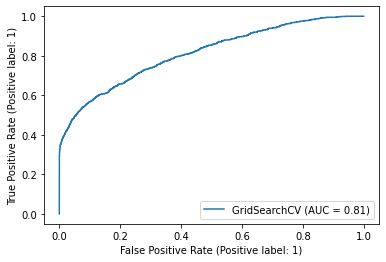

In [ ]:
plot_roc_curve(grid_smote, X_test, y_test)

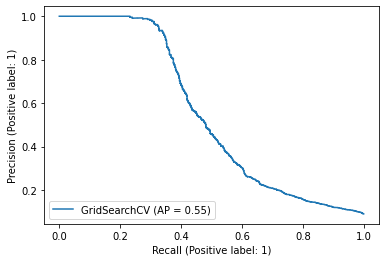

In [ ]:
plot_precision_recall_curve(grid_smote, X_test, y_test)

<Figure size 1440x720 with 0 Axes>

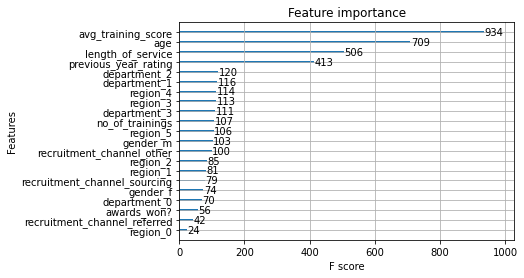

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
# plot feature importance
plt.figure(figsize=(20,10))
plot_importance(xgb)
plt.show()

Dari table fitur importance model yang kita gunakan, feature yang paling mempengaruhi klasifikasi target **is_promoted** dalam model XGBoost adalah :
* avg_training_score
* age
* length_of_service
* previous_year_rating